### Importing all the relevant libraries

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import pkg_resources
import pandas as pd
import numpy as np
import sobol_seq
from tabulate import tabulate
import types

def get_imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            
            name = val.__name__.split(".")[0]

        elif isinstance(val, type):
            name = val.__module__.split(".")[0]
            
        poorly_named_packages = {
            "PIL": "Pillow",
            "sklearn": "scikit-learn"
        }
        if name in poorly_named_packages.keys():
            name = poorly_named_packages[name]

        yield name
imports = list(set(get_imports()))

requirements = []
for m in pkg_resources.working_set:
    if m.project_name in imports and m.project_name!="pip":
        requirements.append((m.project_name, m.version))

for r in requirements:
    print("{}=={}".format(*r))

### Get the estimated expenditure distributions at the member-state level

In [ ]:
df_EU = pd.read_csv('Expenditure.csv')

df_20072013_ERDF_IT = df_EU.groupby(['ProgrammingPeriod','FundingScheme','Country']).get_group(('2007-2013','ERDF_TOTAL','IT'))

dist = df_20072013_ERDF_IT.groupby('r')[[str(y) for y in range(2007,2017)]].sum()

### Get rid of the exceeding figure of the uncertified expenditures

In [33]:
df = pd.read_excel('20181231 Pagamenti ammessi PO 2007-2013.xls',usecols=[0,1,2,3,4,5,7])
df_REGIO = df[(df['CCI'].str.contains("161"))|df['CCI'].str.contains("162")]
df_REGIO_capped = df_REGIO[df_REGIO.ANNO<2017]
Excess = -dist.iloc[0].sum()+df_REGIO_capped.PAGAMENTO_AMMESSO_UE.sum()
df_REGIO_yearly = df_REGIO_capped.groupby('ANNO')
df_REGIO_sum = pd.DataFrame([dfr.PAGAMENTO_AMMESSO_UE.sum() for idf, dfr in df_REGIO_yearly], 
                            index=[idf for idf, dfr in df_REGIO_yearly],columns=['sum'])

In [39]:
d_l = []
for i in reversed(df_REGIO_sum.index):
    df_REGIO_norm = df_REGIO_sum.copy()
    df_REGIO_norm.loc[i:2016]=df_REGIO_sum.loc[i:2016]-Excess/(2016-i+1)
    d_l.append(df_REGIO_norm)
df_REGIO_normalization = pd.concat(d_l,axis=1)

### Evaluate their relation

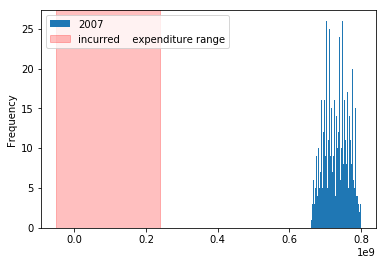

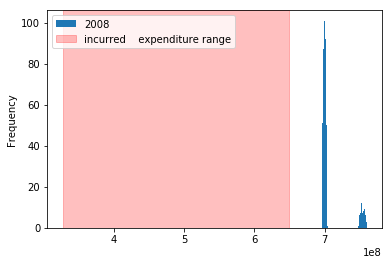

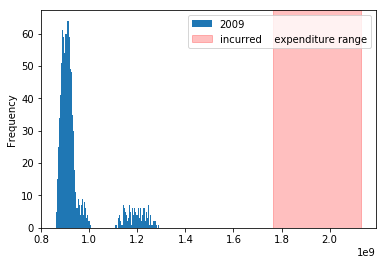

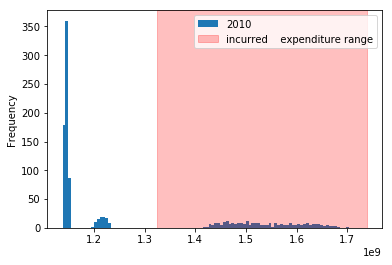

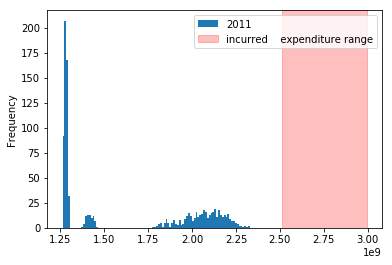

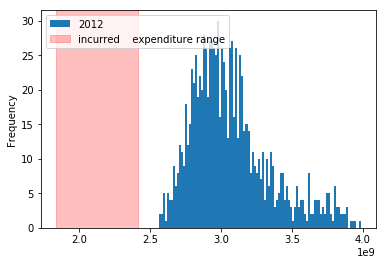

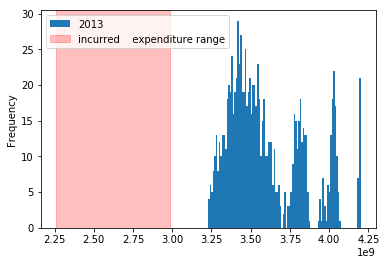

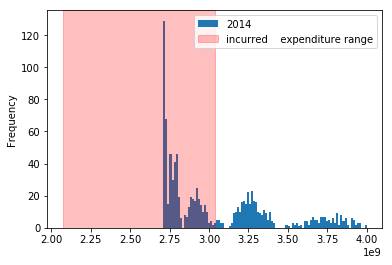

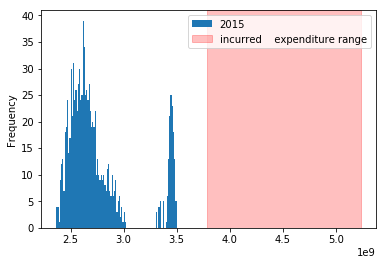

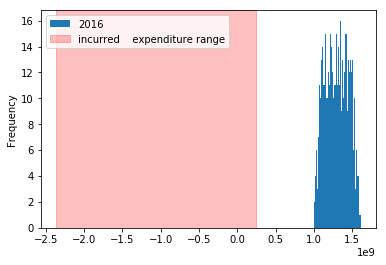

In [60]:
for c in dist:
    dist[c].plot.hist(bins = 100)
    plt.axvspan(df_REGIO_normalization.loc[int(c)].min(), df_REGIO_normalization.loc[int(c)].max(), alpha=0.25, color='red',label='incurred\
    expenditure range')
    plt.legend()
    plt.show()